# Import packages and upload dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

In [2]:
df = pd.read_csv("data/compas-scores-raw.csv")
df.head()

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,7,Risk of Violence,-2.08,4,Low,New,1,0
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,8,Risk of Recidivism,-1.06,2,Low,New,1,0
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,NaN,Male,Caucasian,12/05/92,...,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New,1,0
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,7,Risk of Violence,-2.84,2,Low,New,1,0
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,NaN,Male,Caucasian,09/16/84,...,1,Low,8,Risk of Recidivism,-1.50,1,Low,New,1,0


In [3]:
pr = pd.read_csv("data/propublica_data_for_fairml.csv")
pr.head()

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0


In [4]:
cx = pd.read_csv("data/cox-violent-parsed_filt.csv")
cx.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


# Inspecting the Data

In [5]:
df.dtypes

Person_ID                    int64
AssessmentID                 int64
Case_ID                      int64
Agency_Text                 object
LastName                    object
FirstName                   object
MiddleName                  object
Sex_Code_Text               object
Ethnic_Code_Text            object
DateOfBirth                 object
ScaleSet_ID                  int64
ScaleSet                    object
AssessmentReason            object
Language                    object
LegalStatus                 object
CustodyStatus               object
MaritalStatus               object
Screening_Date              object
RecSupervisionLevel          int64
RecSupervisionLevelText     object
Scale_ID                     int64
DisplayText                 object
RawScore                   float64
DecileScore                  int64
ScoreText                   object
AssessmentType              object
IsCompleted                  int64
IsDeleted                    int64
dtype: object

In [6]:
df.describe()

,Person_ID,AssessmentID,Case_ID,ScaleSet_ID,RecSupervisionLevel,Scale_ID,RawScore,DecileScore,IsCompleted,IsDeleted
count,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.000000,60843.0,60843.0
mean,53683.206154,68061.029190,60209.128149,21.819536,1.630048,11.000000,5.081457,3.571701,1.0,0.0
std,14363.648515,7320.208226,9638.501654,0.932614,0.944220,4.966596,10.080518,2.617854,0.0,0.0
min,656.000000,649.000000,350.000000,17.000000,1.000000,7.000000,-4.790000,-1.000000,1.0,0.0
25%,52039.000000,62582.000000,56021.000000,22.000000,1.000000,7.000000,-2.090000,1.000000,1.0,0.0
50%,57321.000000,68229.000000,61261.000000,22.000000,1.000000,8.000000,-0.710000,3.000000,1.0,0.0
75%,62748.000000,73870.000000,66554.000000,22.000000,2.000000,18.000000,14.000000,5.000000,1.0,0.0
max,68608.000000,79678.000000,72045.000000,22.000000,4.000000,18.000000,51.000000,10.000000,1.0,0.0


Investigating the nan data:

In [7]:
df.isnull().sum() 

Person_ID                      0
AssessmentID                   0
Case_ID                        0
Agency_Text                    0
LastName                       0
FirstName                      0
MiddleName                 45195
Sex_Code_Text                  0
Ethnic_Code_Text               0
DateOfBirth                    0
ScaleSet_ID                    0
ScaleSet                       0
AssessmentReason               0
Language                       0
LegalStatus                    0
CustodyStatus                  0
MaritalStatus                  0
Screening_Date                 0
RecSupervisionLevel            0
RecSupervisionLevelText        0
Scale_ID                       0
DisplayText                    0
RawScore                       0
DecileScore                    0
ScoreText                     45
AssessmentType                 0
IsCompleted                    0
IsDeleted                      0
dtype: int64

In [8]:
df.apply("nunique")

Person_ID                  18610
AssessmentID               20281
Case_ID                    19530
Agency_Text                    4
LastName                   10896
FirstName                   7225
MiddleName                  1871
Sex_Code_Text                  2
Ethnic_Code_Text               9
DateOfBirth                10382
ScaleSet_ID                    2
ScaleSet                       2
AssessmentReason               1
Language                       2
LegalStatus                    7
CustodyStatus                  6
MaritalStatus                  7
Screening_Date               705
RecSupervisionLevel            4
RecSupervisionLevelText        4
Scale_ID                       3
DisplayText                    3
RawScore                     659
DecileScore                   11
ScoreText                      3
AssessmentType                 2
IsCompleted                    1
IsDeleted                      1
dtype: int64

In [9]:
df.shape

(60843, 28)

In [10]:
pr.dtypes

Two_yr_Recidivism       int64
Number_of_Priors        int64
score_factor            int64
Age_Above_FourtyFive    int64
Age_Below_TwentyFive    int64
African_American        int64
Asian                   int64
Hispanic                int64
Native_American         int64
Other                   int64
Female                  int64
Misdemeanor             int64
dtype: object

In [11]:
pr.describe()

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
count,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,0.455120,3.246436,0.445723,0.209494,0.218244,0.514420,0.005023,0.082469,0.001782,0.055574,0.190376,0.356773
std,0.498022,4.743770,0.497086,0.406981,0.413087,0.499833,0.070698,0.275101,0.042182,0.229115,0.392629,0.479086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
pr.isnull().sum()

Two_yr_Recidivism       0
Number_of_Priors        0
score_factor            0
Age_Above_FourtyFive    0
Age_Below_TwentyFive    0
African_American        0
Asian                   0
Hispanic                0
Native_American         0
Other                   0
Female                  0
Misdemeanor             0
dtype: int64

In [13]:
pr.apply("nunique")

Two_yr_Recidivism        2
Number_of_Priors        36
score_factor             2
Age_Above_FourtyFive     2
Age_Below_TwentyFive     2
African_American         2
Asian                    2
Hispanic                 2
Native_American          2
Other                    2
Female                   2
Misdemeanor              2
dtype: int64

In [14]:
pr.shape

(6172, 12)

In [15]:
cx.dtypes

id                         float64
name                        object
first                       object
last                        object
sex                         object
dob                         object
age                          int64
age_cat                     object
race                        object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date              object
r_charge_desc               object
r_jail_in                   object
violent_recid              float64
is_violent_recid             int64
vr_charge_degree    

In [16]:
cx.describe()

,id,age,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_days_from_compas,is_recid,r_days_from_arrest,violent_recid,is_violent_recid,decile_score.1,v_decile_score,priors_count.1,event
count,11001.00000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000,17019.000000,17449.000000,18316.000000,6359.000000,0.0,18316.000000,18316.000000,18316.000000,18316.000000,18316.000000
mean,5501.00000,34.019273,0.076873,4.997052,0.098439,0.124263,3.913191,4.302485,57.694596,0.414774,19.961629,NaN,0.073105,4.997052,4.022822,3.913191,0.044715
std,3175.85949,11.667811,0.464272,2.937569,0.517639,0.524537,5.299864,81.159881,317.994694,0.576449,74.139695,NaN,0.260317,2.937569,2.614189,5.299864,0.206683
min,1.00000,18.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-597.000000,0.000000,-1.000000,-1.000000,NaN,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,2751.00000,25.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,2.000000,2.000000,0.000000,0.000000
50%,5501.00000,31.000000,0.000000,5.000000,0.000000,0.000000,2.000000,-1.000000,1.000000,0.000000,0.000000,NaN,0.000000,5.000000,4.000000,2.000000,0.000000
75%,8251.00000,41.000000,0.000000,8.000000,0.000000,0.000000,5.000000,0.000000,2.000000,1.000000,1.000000,NaN,0.000000,8.000000,6.000000,5.000000,0.000000
max,11001.00000,96.000000,20.000000,10.000000,13.000000,17.000000,43.000000,1057.000000,9485.000000,1.000000,993.000000,NaN,1.000000,10.000000,10.000000,43.000000,1.000000


In [17]:
cx.isnull().sum()

id                          7315
name                           0
first                          0
last                           0
sex                            0
dob                            0
age                            0
age_cat                        0
race                           0
juv_fel_count                  0
decile_score                   0
juv_misd_count                 0
juv_other_count                0
priors_count                   0
days_b_screening_arrest     1297
c_jail_in                   1297
c_jail_out                  1297
c_days_from_compas           867
c_charge_degree              867
c_charge_desc                881
is_recid                       0
r_charge_degree             9899
r_days_from_arrest         11957
r_offense_date              9899
r_charge_desc              10039
r_jail_in                  11957
violent_recid              18316
is_violent_recid               0
vr_charge_degree           16977
vr_offense_date            16977
vr_charge_

In [18]:
cx.apply("nunique")

id                         11001
name                       10855
first                       3876
last                        5635
sex                            2
dob                         7485
age                           65
age_cat                        3
race                           6
juv_fel_count                 12
decile_score                  11
juv_misd_count                11
juv_other_count               12
priors_count                  39
days_b_screening_arrest      534
c_jail_in                   9806
c_jail_out                  8714
c_days_from_compas           657
c_charge_degree               14
c_charge_desc                513
is_recid                       3
r_charge_degree               10
r_days_from_arrest           201
r_offense_date              1075
r_charge_desc                341
r_jail_in                    972
violent_recid                  0
is_violent_recid               2
vr_charge_degree               9
vr_offense_date              570
vr_charge_

# Cleaning the Data

## Checking for Missing Data Values

In [19]:
df.columns

Index(['Person_ID', 'AssessmentID', 'Case_ID', 'Agency_Text', 'LastName',
       'FirstName', 'MiddleName', 'Sex_Code_Text', 'Ethnic_Code_Text',
       'DateOfBirth', 'ScaleSet_ID', 'ScaleSet', 'AssessmentReason',
       'Language', 'LegalStatus', 'CustodyStatus', 'MaritalStatus',
       'Screening_Date', 'RecSupervisionLevel', 'RecSupervisionLevelText',
       'Scale_ID', 'DisplayText', 'RawScore', 'DecileScore', 'ScoreText',
       'AssessmentType', 'IsCompleted', 'IsDeleted'],
      dtype='object')

<AxesSubplot:>

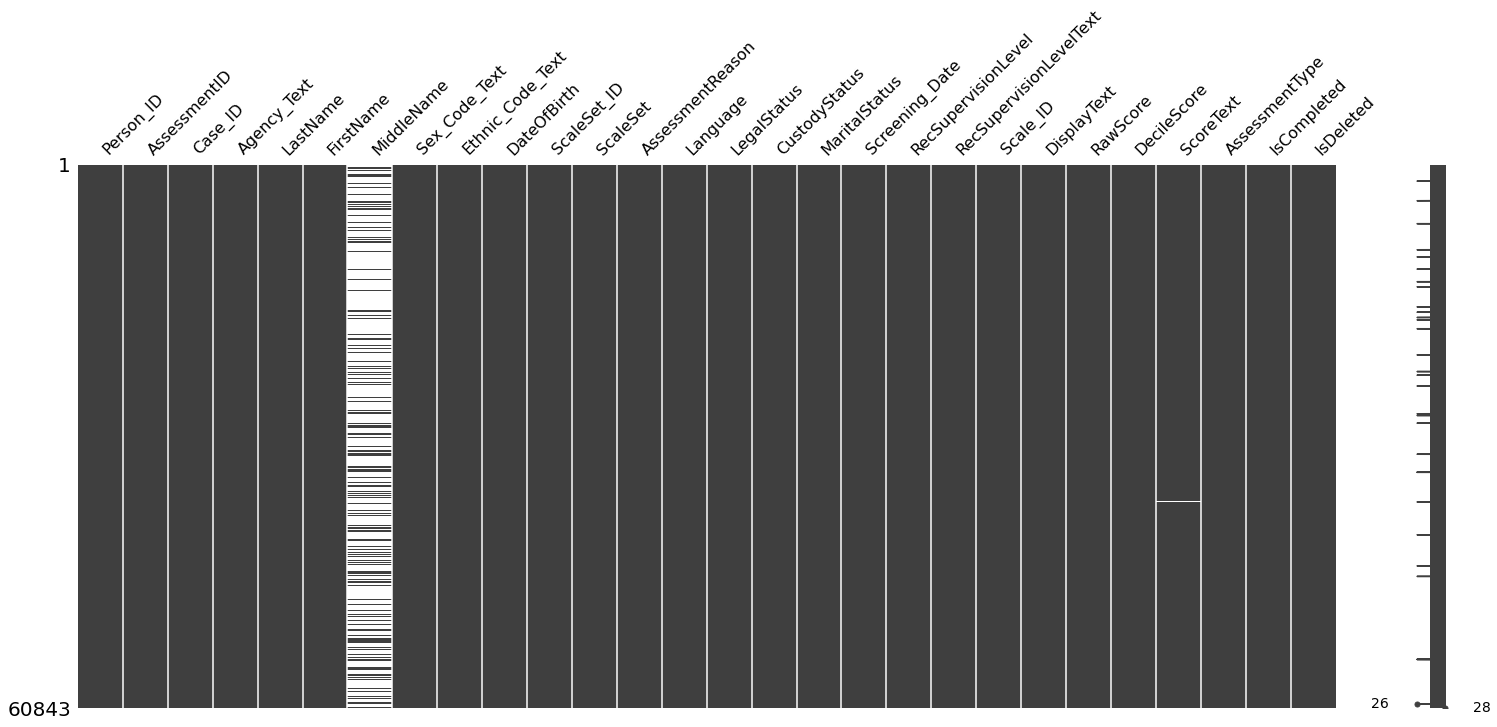

In [20]:
import missingno as msno

# visualizing it:
msno.matrix(df)

One of the missing data lies in the ScoreText column. Let us analyze this:

In [21]:
df[df["ScoreText"].isnull() == True]

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,MiddleName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,...,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType,IsCompleted,IsDeleted
1837,51351,57821,52534,PRETRIAL,Taffe,Horace,NaN,Male,African-American,11/28/71,...,2,Medium,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
4033,51986,58599,53245,PRETRIAL,Farr,Clee,NaN,Male,Caucasian,12/22/95,...,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
6603,52760,59586,54136,Probation,Diaz,Jahaira,NaN,Female,Hispanic,01/16/81,...,1,Low,7,Risk of Violence,-1.0,-1,NaN,New,1,0
6604,52760,59586,54136,Probation,Diaz,Jahaira,NaN,Female,Hispanic,01/16/81,...,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
7173,52910,59783,54307,PRETRIAL,MILLER,MIKHAIL,LEONARD,Male,African-American,10/12/93,...,1,Low,7,Risk of Violence,-1.0,-1,NaN,New,1,0
7174,52910,59783,54307,PRETRIAL,MILLER,MIKHAIL,LEONARD,Male,African-American,10/12/93,...,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
9519,53624,60648,55078,PRETRIAL,SAINTJEAN,GEORGE,NaN,Male,African-American,09/17/55,...,1,Low,7,Risk of Violence,-1.0,-1,NaN,New,1,0
9520,53624,60648,55078,PRETRIAL,SAINTJEAN,GEORGE,NaN,Male,African-American,09/17/55,...,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
10318,53822,60933,55318,PRETRIAL,Rohrs,Michael,NaN,Male,Caucasian,02/06/68,...,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,New,1,0
11686,53689,61466,55160,PRETRIAL,Winkelmann,William,NaN,Male,Caucasian,12/15/63,...,1,Low,8,Risk of Recidivism,-1.0,-1,NaN,Copy,1,0


In [22]:
df["ScoreText"].value_counts(True)

Low       0.682374
Medium    0.205401
High      0.112224
Name: ScoreText, dtype: float64

In [23]:
df["ScoreText"].isnull().sum()

45

Most of the data has low ScoreText. Since there is not a lot of missing data for ScoreText (45) of a total 60843 total rows. Thus, we can just fill these values with the most common value (Low).

In [24]:
df["ScoreText"] = df["ScoreText"].fillna(df["ScoreText"].mode)

As seen from the isnull analysis of the data and the missingno matrix visualization, most people do not have a middle name and this is not relevant to exploring the data in our dataset, so we may remove that column. We also see that isCompleted, isDeleted, AssessmentReason only has one value, so this will also be irrelevant to our analysis.

In [25]:
df["AssessmentReason"]

0        Intake
1        Intake
2        Intake
3        Intake
4        Intake
          ...  
60838    Intake
60839    Intake
60840    Intake
60841    Intake
60842    Intake
Name: AssessmentReason, Length: 60843, dtype: object

In [26]:
df["Ethnic_Code_Text"].unique()

array(['Caucasian', 'African-American', 'Hispanic', 'Other', 'Asian',
       'African-Am', 'Native American', 'Oriental', 'Arabic'],
      dtype=object)

All texts that are African-American and African-Am should be the same.

In [27]:
df["Ethnic_Code_Text"] = df["Ethnic_Code_Text"].replace({"African-Am": "African-American"})

In [28]:
df["Ethnic_Code_Text"].unique() # checking if change worked

array(['Caucasian', 'African-American', 'Hispanic', 'Other', 'Asian',
       'Native American', 'Oriental', 'Arabic'], dtype=object)

In [29]:
df = df.drop(['MiddleName', 'IsCompleted', 'IsDeleted', 'AssessmentReason'], axis=1)
df

,Person_ID,AssessmentID,Case_ID,Agency_Text,LastName,FirstName,Sex_Code_Text,Ethnic_Code_Text,DateOfBirth,ScaleSet_ID,...,MaritalStatus,Screening_Date,RecSupervisionLevel,RecSupervisionLevelText,Scale_ID,DisplayText,RawScore,DecileScore,ScoreText,AssessmentType
0,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/05/92,22,...,Single,1/1/13 0:00,1,Low,7,Risk of Violence,-2.08,4,Low,New
1,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/05/92,22,...,Single,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.06,2,Low,New
2,50844,57167,51950,PRETRIAL,Fisher,Kevin,Male,Caucasian,12/05/92,22,...,Single,1/1/13 0:00,1,Low,18,Risk of Failure to Appear,15.00,1,Low,New
3,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,09/16/84,22,...,Married,1/1/13 0:00,1,Low,7,Risk of Violence,-2.84,2,Low,New
4,50848,57174,51956,PRETRIAL,KENDALL,KEVIN,Male,Caucasian,09/16/84,22,...,Married,1/1/13 0:00,1,Low,8,Risk of Recidivism,-1.50,1,Low,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60838,65667,79665,72038,Probation,West,James,Male,African-American,06/21/64,22,...,Single,12/31/14 0:00,3,Medium with Override Consideration,8,Risk of Recidivism,0.16,8,High,New
60839,65667,79665,72038,Probation,West,James,Male,African-American,06/21/64,22,...,Single,12/31/14 0:00,3,Medium with Override Consideration,18,Risk of Failure to Appear,35.00,10,High,New
60840,68603,79669,72042,PRETRIAL,Ryan,Michael,Male,Caucasian,02/06/85,22,...,Single,12/31/14 0:00,1,Low,7,Risk of Violence,-2.75,2,Low,New
60841,68603,79669,72042,PRETRIAL,Ryan,Michael,Male,Caucasian,02/06/85,22,...,Single,12/31/14 0:00,1,Low,8,Risk of Recidivism,-0.34,5,Medium,New


There are a few columns that should be represented in datetime objects, but are solely represented as objects. Thus, we should convert these columns: DateofBirth, Screening_Date

In [30]:
df["DateOfBirth"] = pd.to_datetime(df["DateOfBirth"], format="%m/%d/%y")

In [31]:
df["Screening_Date"] = pd.to_datetime(df["Screening_Date"], format="%m/%d/%y %H:%M")

Creating a new variable to analyze age of each person at time of screening: 

In [32]:
def parse_date(td):
    resYear = float(td.days)/364.0                
    resMonth = int((resYear - int(resYear))*364/30) 
    resYear = int(resYear)
    return str(resYear) + "Y" + str(resMonth) + "m"

In [33]:
df["Age_At_Screening"] = abs(df["Screening_Date"] - df["DateOfBirth"])

In [34]:
df["Age_At_Screening"].apply(lambda date: parse_date(date))

0        20Y1m
1        20Y1m
2        20Y1m
3        28Y4m
4        28Y4m
         ...  
60838    49Y7m
60839    49Y7m
60840    30Y0m
60841    30Y0m
60842    30Y0m
Name: Age_At_Screening, Length: 60843, dtype: object

In [35]:
df.drop(columns=["DateOfBirth", "Screening_Date", "AssessmentID", "Case_ID"], inplace=True)

<AxesSubplot:>

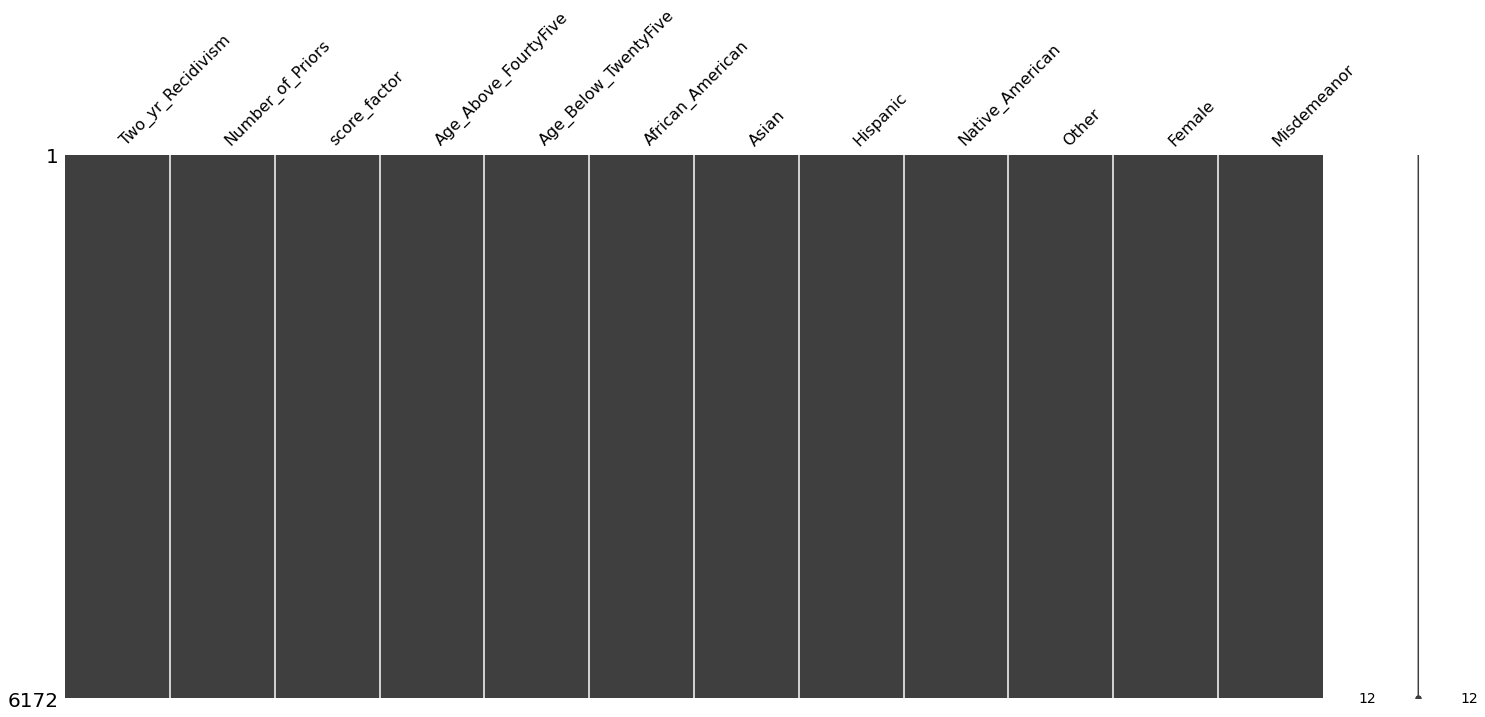

In [36]:
msno.matrix(pr)

In [37]:
pr.head()

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
0,0,0,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0
2,1,4,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,1
4,1,14,1,0,0,0,0,0,0,0,0,0


No missing variables are found in this dataset, and it seems as if the dataset is already cleaned (one hot encoded etc.)

<AxesSubplot:>

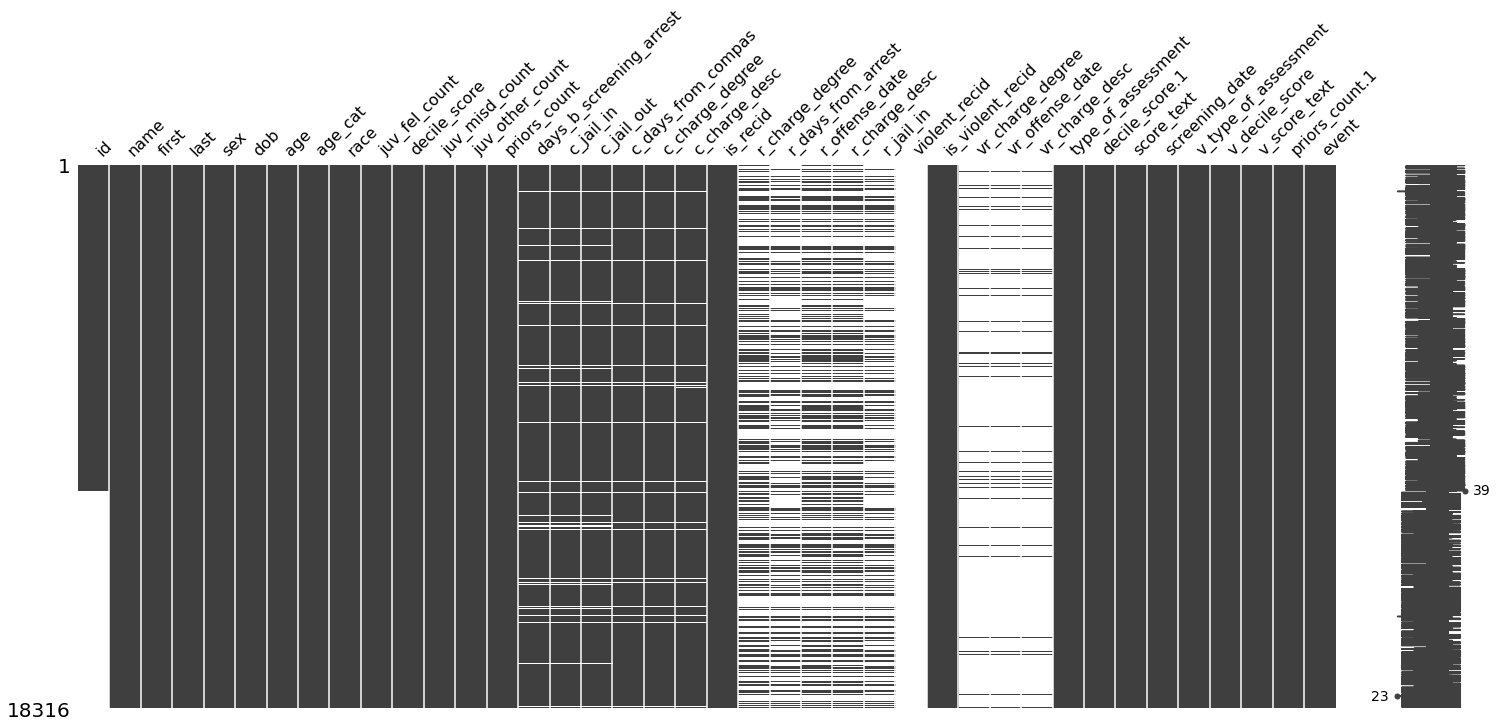

In [38]:
msno.matrix(cx)

# Exploratory Data Analysis

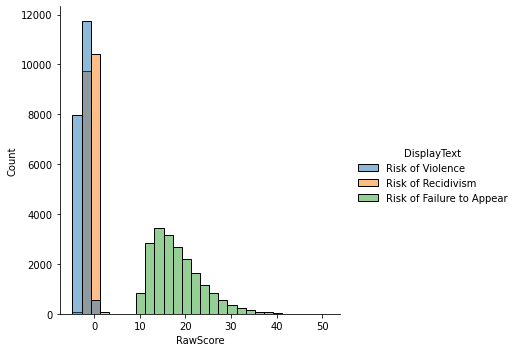

In [39]:
sns.displot(df, x="RawScore", binwidth=2, hue="DisplayText")

We can clearly see a lower raw score was associated with an increase of risk of violence and risk of recidivism.

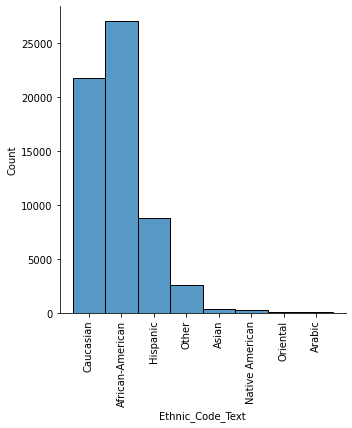

In [80]:
ax = sns.displot(df, x="Ethnic_Code_Text", palette="pastel")
ax.set_xticklabels(rotation=90)

It is clear within the span this data was collected, African Americans were in the court justice system the most.

[Text(0, 0, 'Caucasian'),
 Text(1, 0, 'African-American'),
 Text(2, 0, 'Hispanic'),
 Text(3, 0, 'Other'),
 Text(4, 0, 'Asian'),
 Text(5, 0, 'Native American'),
 Text(6, 0, 'Oriental'),
 Text(7, 0, 'Arabic')]

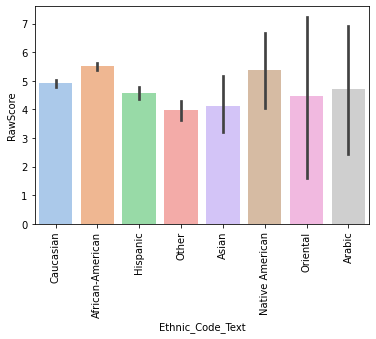

In [41]:
ax = sns.barplot(x="Ethnic_Code_Text", y="RawScore", data=df, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

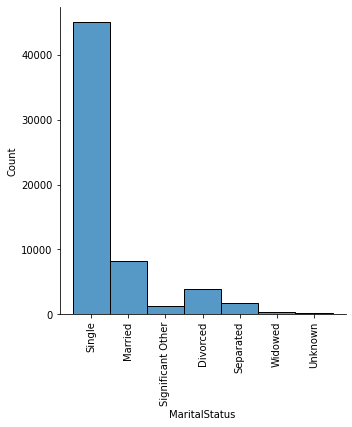

In [42]:
ax = sns.displot(df, x="MaritalStatus")
ax.set_xticklabels(rotation=90)

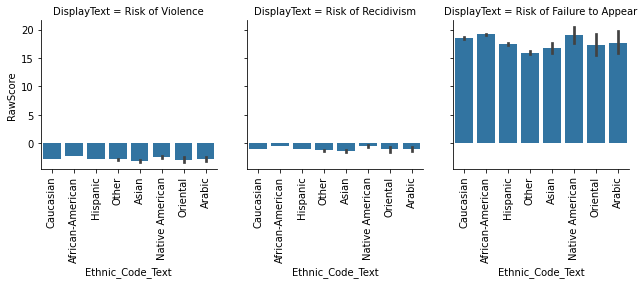

In [43]:
g = sns.FacetGrid(df, col="DisplayText", margin_titles=True)
g.map(sns.barplot, "Ethnic_Code_Text", "RawScore", order=["Caucasian", "African-American", "Hispanic", "Other", "Asian", "Native American", "Oriental", "Arabic"])
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

/Users/sharonhe/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


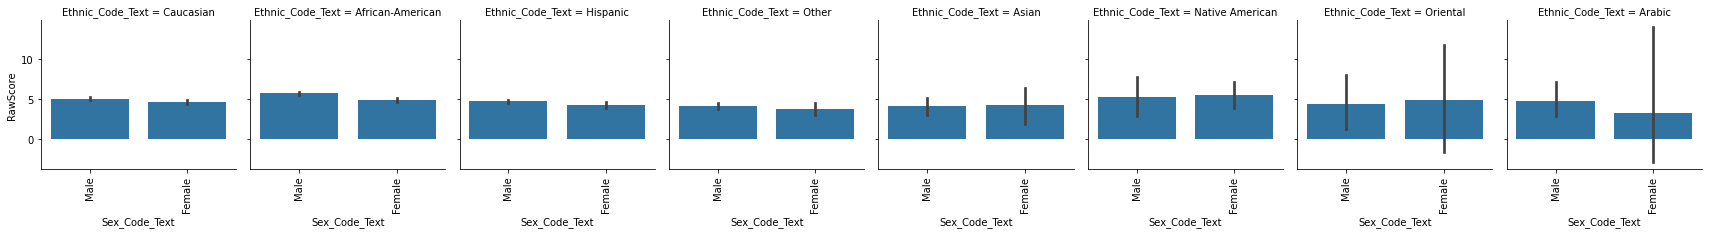

In [44]:
g = sns.FacetGrid(df, col="Ethnic_Code_Text", margin_titles=True)
g.map(sns.barplot, "Sex_Code_Text", "RawScore")
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

/Users/sharonhe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


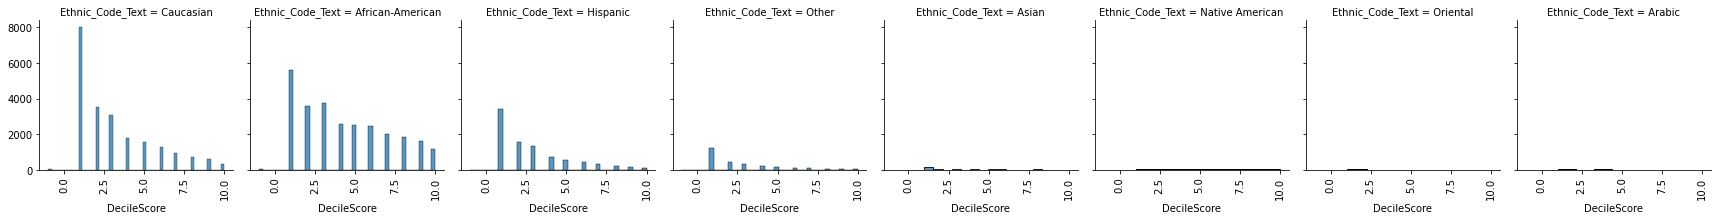

In [82]:
g = sns.FacetGrid(df, col="Ethnic_Code_Text", margin_titles=True)
g.map(sns.histplot,"DecileScore")
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

In [46]:
df.columns

Index(['Person_ID', 'Agency_Text', 'LastName', 'FirstName', 'Sex_Code_Text',
       'Ethnic_Code_Text', 'ScaleSet_ID', 'ScaleSet', 'Language',
       'LegalStatus', 'CustodyStatus', 'MaritalStatus', 'RecSupervisionLevel',
       'RecSupervisionLevelText', 'Scale_ID', 'DisplayText', 'RawScore',
       'DecileScore', 'ScoreText', 'AssessmentType', 'Age_At_Screening'],
      dtype='object')

# Modelling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

In [48]:
target_var = "Two_yr_Recidivism"
independent_vars = pr.drop(columns=target_var).columns

In [49]:
pr["Two_yr_Recidivism"].value_counts(True) # fairly even distribution of the variables

0    0.54488
1    0.45512
Name: Two_yr_Recidivism, dtype: float64

In [50]:
X = pr[independent_vars]
y = pr["Two_yr_Recidivism"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print("SHAPES: ", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

SHAPES:  (4937, 11) (4937,) (1235, 11) (1235,)


## Logistic Regression

In [52]:
model = LogisticRegression()

In [53]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
predictions = model.predict(X_test)
predictions[:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [55]:
factors = {
    "vars": independent_vars,
    "coefficients": model.coef_
}
data = {"Variables": ["Number_of_Priors", "score_factor", 'Age_Above_FourtyFive',
        'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic',
        'Native_American', 'Other', 'Female', 'Misdemeanor'], "Coefficients": [0.13815641,  0.70733166, -0.46071984,  0.57596648,  0.06213475,
        -0.32426533, -0.06403485, -0.27154445, -0.05211602, -0.43170212,
        -0.22402873]}
pd.DataFrame(data)

,Variables,Coefficients
0,Number_of_Priors,0.138156
1,score_factor,0.707332
2,Age_Above_FourtyFive,-0.460720
3,Age_Below_TwentyFive,0.575966
4,African_American,0.062135
5,Asian,-0.324265
6,Hispanic,-0.064035
7,Native_American,-0.271544
8,Other,-0.052116
9,Female,-0.431702


In [56]:
model.intercept_

array([-0.82436488])

In [57]:
predictions_prob = model.predict_proba(X_test)
predictions_prob[:10]

array([[0.17988804, 0.82011196],
       [0.72597019, 0.27402981],
       [0.61914418, 0.38085582],
       [0.630989  , 0.369011  ],
       [0.4587471 , 0.5412529 ],
       [0.74188247, 0.25811753],
       [0.65337877, 0.34662123],
       [0.28168838, 0.71831162],
       [0.44487145, 0.55512855],
       [0.5886276 , 0.4113724 ]])

/Users/sharonhe/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Prob1'>

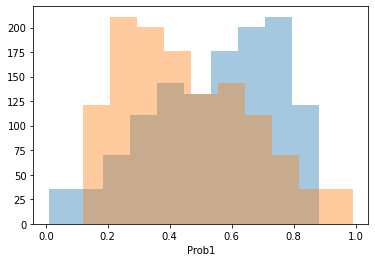

In [58]:
sns.distplot(predictions_prob[:,0], bins= 10, kde = False, label = 'Prob0', axlabel = 'Prob0')
sns.distplot(predictions_prob[:,1], bins = 10, kde = False, label = 'Prob1', axlabel = 'Prob1')

In [59]:
probs_df = pd.DataFrame(predictions_prob)
probs_df = round(probs_df, 2)
probs_df.head(10)

,0,1
0,0.18,0.82
1,0.73,0.27
2,0.62,0.38
3,0.63,0.37
4,0.46,0.54
5,0.74,0.26
6,0.65,0.35
7,0.28,0.72
8,0.44,0.56
9,0.59,0.41


In [60]:
results = X_test.reset_index().copy()
results["target"] = y_test.tolist()
results["prediction"] = predictions
results = pd.concat([results, probs_df], axis=1)
results[["target", "prediction", 0, 1]].head(10)

,target,prediction,0,1
0,1,1,0.18,0.82
1,0,0,0.73,0.27
2,0,0,0.62,0.38
3,0,0,0.63,0.37
4,0,1,0.46,0.54
5,0,0,0.74,0.26
6,1,0,0.65,0.35
7,1,1,0.28,0.72
8,1,1,0.44,0.56
9,0,0,0.59,0.41


In [61]:
cv_res = cross_val_score(LogisticRegression(),  
                X,
                y, 
                scoring="roc_auc",
                cv=10) 

In [62]:
cv_res.mean()

0.7324112268855502

## Decision Trees

In [63]:
tree = DecisionTreeClassifier()

In [64]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
tree.predict(pr[independent_vars])[:10] # first ten prediction

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

In [66]:
base_tree_score = cross_val_score(tree, X_train, y_train, scoring="roc_auc", cv=3).mean()

base_tree_score

0.6753396929391199

In [67]:
dict(zip(
    independent_vars,
    tree.feature_importances_
))

{'Number_of_Priors': 0.30157058891339755,
 'score_factor': 0.3335567396344987,
 'Age_Above_FourtyFive': 0.04878649005194543,
 'Age_Below_TwentyFive': 0.06490972394221749,
 'African_American': 0.058974588044341955,
 'Asian': 0.008262489547326418,
 'Hispanic': 0.03069987961109218,
 'Native_American': 0.004925019602695855,
 'Other': 0.029881441221577845,
 'Female': 0.06397005099174286,
 'Misdemeanor': 0.054462988439163695}

In [68]:
import graphviz
from sklearn.tree import export_graphviz

def draw_tree(tree):
    dot_data = export_graphviz(tree, out_file=None,
                              feature_names=independent_vars,
                              class_names=["Recidivate", "Did not recidivate"],
                              filled=True,
                              impurity=False,
                              rounded=True,
                              special_characters=True,
                              proportion=True)
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('tree', view=True)

In [ ]:
draw_tree(tree)

## KNN Classifiers

In [83]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [84]:
knn_classifier = KNeighborsClassifier(n_neighbors=10, 
                                        weights="uniform")

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [86]:
from sklearn.metrics import f1_score
predictions = knn_classifier.predict(X_test)
f1_score(y_test, predictions, average="macro")

0.6442799188640973

## Hyperparameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [88]:
search_parameters_space = {
    "max_depth": np.arange(2,10),
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
}

In [89]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=search_parameters_space, scoring="roc_auc", n_jobs=1)

In [90]:
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [91]:
%%time
grid.fit(X_train, y_train)

CPU times: user 999 ms, sys: 12.5 ms, total: 1.01 s
Wall time: 1.02 s


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [92]:
print(grid.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}


In [93]:
pd.DataFrame(grid.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.003868,0.000442,0.002397,0.000265,gini,5,best,"{'criterion': 'gini', 'max_depth': 5, 'splitte...",0.722834,0.737791,0.696106,0.753481,0.715657,0.725174,0.019501,1
23,0.002629,0.000121,0.001782,0.000104,entropy,5,random,"{'criterion': 'entropy', 'max_depth': 5, 'spli...",0.723697,0.727447,0.708992,0.746705,0.718275,0.725023,0.012492,2
8,0.003323,0.000267,0.001746,0.000041,gini,6,best,"{'criterion': 'gini', 'max_depth': 6, 'splitte...",0.723986,0.733737,0.697387,0.752050,0.713338,0.724100,0.018458,3
4,0.003142,0.000604,0.001902,0.000261,gini,4,best,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.730066,0.734695,0.697931,0.737220,0.718368,0.723656,0.014399,4
20,0.003703,0.000203,0.002590,0.000194,entropy,4,best,"{'criterion': 'entropy', 'max_depth': 4, 'spli...",0.730066,0.725922,0.697931,0.740072,0.721016,0.723001,0.014016,5


In [94]:
def evaluate_model(estimator, X, y):  
    cv_results = cross_validate(estimator, X, y,  
                     scoring="roc_auc", 
                          n_jobs=-1, cv=5,
                     return_train_score=True)
    return pd.DataFrame(cv_results).mean().to_dict()

RESULTS = {}

In [95]:
RESULTS["grid_tree"] = evaluate_model(grid.best_estimator_,
                                             X_test, y_test)

In [96]:
pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
grid_tree,0.007048,0.004353,0.679125,0.75919


In [97]:
from scipy.stats import randint as sp_randint
#from scipy.stats import uniform 

search_parameters_space_random = {"max_depth": [3, None],
              "max_features": sp_randint(1, 9),
              "min_samples_leaf": sp_randint(1, 9),
              "criterion": ["gini","entropy"]}

In [98]:
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(), 
    param_distributions=search_parameters_space_random,
   scoring="roc_auc", n_jobs=-1, 
    n_iter=50)

In [99]:
%%time
random_search.fit(X_train, y_train)

CPU times: user 326 ms, sys: 20.2 ms, total: 346 ms
Wall time: 734 ms


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
       

In [100]:
random_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 7}

In [101]:
random_search.best_score_

0.7221643451233717

In [102]:
RESULTS["random_tree"] = evaluate_model(random_search.best_estimator_,
                                             X_test, y_test)

In [103]:
pd.DataFrame.from_dict(RESULTS).T 

,fit_time,score_time,test_score,train_score
grid_tree,0.007048,0.004353,0.679125,0.759190
random_tree,0.006052,0.004181,0.678549,0.766628


In [122]:
search_parameters_space_random_log = {"penalty": ["l1", "l2", "elasticnet", "none"],
              "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                                 "max_iter": sp_randint(5, 15)}


In [123]:
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(), 
    param_distributions=search_parameters_space_random_log,
   scoring="roc_auc", n_jobs=-1, 
    n_iter=50)

In [124]:
%%time
random_search.fit(X_train, y_train)

CPU times: user 367 ms, sys: 25.1 ms, total: 392 ms
Wall time: 1.53 s


/Users/sharonhe/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd9ae76ba10>,
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                 

In [125]:
random_search.best_params_

{'max_iter': 7, 'penalty': 'l1', 'solver': 'saga'}

In [126]:
random_search.best_score_

0.7372907402312067

In [127]:
RESULTS["random_log"] = evaluate_model(random_search.best_estimator_,
                                             X_test, y_test)

In [129]:
pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
grid_tree,0.007048,0.004353,0.679125,0.759190
random_tree,0.006052,0.004181,0.678549,0.766628
random_log,0.011914,0.004702,0.712279,0.715473
random_knn,0.003817,0.008975,0.674567,0.776134


In [130]:
KNeighborsClassifier?

In [131]:
search_parameters_space_random_knn = {"n_neighbors": sp_randint(2,10),
              "weights": ["uniform", "distance"]}

In [132]:
random_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(), 
    param_distributions=search_parameters_space_random_knn,
   scoring="roc_auc", n_jobs=-1, 
    n_iter=50)

In [133]:
%%time
random_search.fit(X_train, y_train)

CPU times: user 418 ms, sys: 29.7 ms, total: 448 ms
Wall time: 2.99 s


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd9aedfae90>,
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='roc_auc', verbose=0)

In [134]:
random_search.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [135]:
random_search.best_score_

0.6998439605438069

In [136]:
RESULTS["random_knn"] = evaluate_model(random_search.best_estimator_,
                                             X_test, y_test)

In [137]:
pd.DataFrame.from_dict(RESULTS).T

,fit_time,score_time,test_score,train_score
grid_tree,0.007048,0.004353,0.679125,0.759190
random_tree,0.006052,0.004181,0.678549,0.766628
random_log,0.011914,0.004702,0.712279,0.715473
random_knn,0.006648,0.012657,0.674567,0.776134


### Redrawing the tree using hyperparamter tuning

In [ ]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=None, max_features=5, min_samples_leaf=7)

In [ ]:
tree.fit(X_train, y_train)

In [ ]:
draw_tree(tree)

In [138]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=5)

In [139]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [140]:
draw_tree(tree)